### DATA PREPROCESSING

#### IMPORTING NECESSARY LIBRARIES

In [3]:
pip install imblearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, precision_score, recall_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

#### LOADING THE DATASET

In [6]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\Machine learning\Chronic_Kidney_Dsease_data.csv", index_col = 0)

In [7]:
df.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
1,71.0,male,caucasian,0,bachelors,31.069414,yes,5.128112,1.676220,0.240386,...,7.556302,76.076800,no,no,poor,1.018824,4.966808,9.871449,ckd,Confidential
2,34.0,male,caucasian,1,higher,29.692119,yes,18.609552,8.377574,6.503233,...,6.836766,40.128498,no,no,good,3.923538,8.189275,7.161765,ckd,Confidential
3,80.0,female,african american,0,high school,37.394822,yes,11.882429,9.607401,2.104828,...,2.144722,92.872842,no,yes,poor,1.429906,7.624028,7.354632,ckd,Confidential
4,40.0,male,asian,0,high school,31.329680,no,16.020165,0.408871,6.964422,...,7.077188,90.080321,no,no,good,3.226416,3.282688,6.629587,ckd,Confidential
5,43.0,male,african american,1,bachelors,23.726311,no,7.944146,0.780319,3.097796,...,3.553118,5.258372,no,no,poor,0.285466,3.849498,1.437385,ckd,Confidential


In [8]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi

#### DATA SHAPE

In [10]:
data_shape = df.shape
print(data_shape)

(1659, 53)


#### UNIQUE VALUES FOR EACH COLUMN

In [12]:
for col in df.columns:
    print(f"Column: {col}\nUnique Values: {df[col].unique()}\n")

Column: Age
Unique Values: [71. 34. 80. 40. 43. 22. 41. 72. 21. 49. 57. 83. 79. 52. 77. 68. 78. 61.
 81. 66. 70. 74. 26. 58. 37. 23. 33. 28. 90. 63. 27. 54. 55. 69. 25. 73.
 82. 53. 67. 59. 45. 60. 48. 64. 84. 20. 30. 24. 47. 31. 42. 56. 46. 62.
 32. 51. 85. 76. 89. 75. 38. 87. 36. 88. 35. 39. 86. 50. 44. 65. 29. nan]

Column: Gender
Unique Values: ['male' 'female']

Column: Ethnicity
Unique Values: ['caucasian' 'african american' 'asian' 'other']

Column: SocioeconomicStatus
Unique Values: [0 1 2]

Column: EducationLevel
Unique Values: ['bachelors' 'higher' 'high school' 'none']

Column: BMI
Unique Values: [31.06941375 29.69211876 37.39482182 ... 21.95121871 24.96414904
 19.25325818]

Column: Smoking
Unique Values: ['yes' 'no' nan]

Column: AlcoholConsumption
Unique Values: [ 5.12811186 18.60955184 11.88242933 ... 15.82595492 12.96746151
 11.39650955]

Column: PhysicalActivity
Unique Values: [1.67621971 8.37757445 9.6074011  ... 7.34996438 0.61861424 7.44631444]

Column: DietQuality
U

In [13]:
df.duplicated().sum()

0

#### FINDING MISSING VALUES

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, 1 to 1659
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1651 non-null   float64
 1   Gender                         1659 non-null   object 
 2   Ethnicity                      1659 non-null   object 
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   object 
 5   BMI                            1659 non-null   float64
 6   Smoking                        1652 non-null   object 
 7   AlcoholConsumption             1652 non-null   float64
 8   PhysicalActivity               1652 non-null   float64
 9   DietQuality                    1652 non-null   float64
 10  SleepQuality                   1652 non-null   float64
 11  FamilyHistoryKidneyDisease     1652 non-null   object 
 12  FamilyHistoryHypertension      1652 non-null   object

In [16]:
df.isnull().sum()

Age                              8
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          7
AlcoholConsumption               7
PhysicalActivity                 7
DietQuality                      7
SleepQuality                     7
FamilyHistoryKidneyDisease       7
FamilyHistoryHypertension        7
FamilyHistoryDiabetes            7
PreviousAcuteKidneyInjury        7
UrinaryTractInfections           7
SystolicBP                       7
DiastolicBP                      7
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  6
BUNLevels                        6
GFR                              6
ProteinInUrine                   6
ACR                              6
SerumElectrolytesSodium          6
SerumElectrolytesPotassium       6
SerumElectrolytesCalcium         6
SerumElectrolytesPho

#### PERCENTAGE OF MISSING VALUE

In [18]:
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

Age                              0.48%
Gender                            0.0%
Ethnicity                         0.0%
SocioeconomicStatus               0.0%
EducationLevel                    0.0%
BMI                               0.0%
Smoking                          0.42%
AlcoholConsumption               0.42%
PhysicalActivity                 0.42%
DietQuality                      0.42%
SleepQuality                     0.42%
FamilyHistoryKidneyDisease       0.42%
FamilyHistoryHypertension        0.42%
FamilyHistoryDiabetes            0.42%
PreviousAcuteKidneyInjury        0.42%
UrinaryTractInfections           0.42%
SystolicBP                       0.42%
DiastolicBP                      0.42%
FastingBloodSugar                 0.0%
HbA1c                             0.0%
SerumCreatinine                  0.36%
BUNLevels                        0.36%
GFR                              0.36%
ProteinInUrine                   0.36%
ACR                              0.36%
SerumElectrolytesSodium  

Text(0.5, 1.0, 'Missing Data in Percentages')

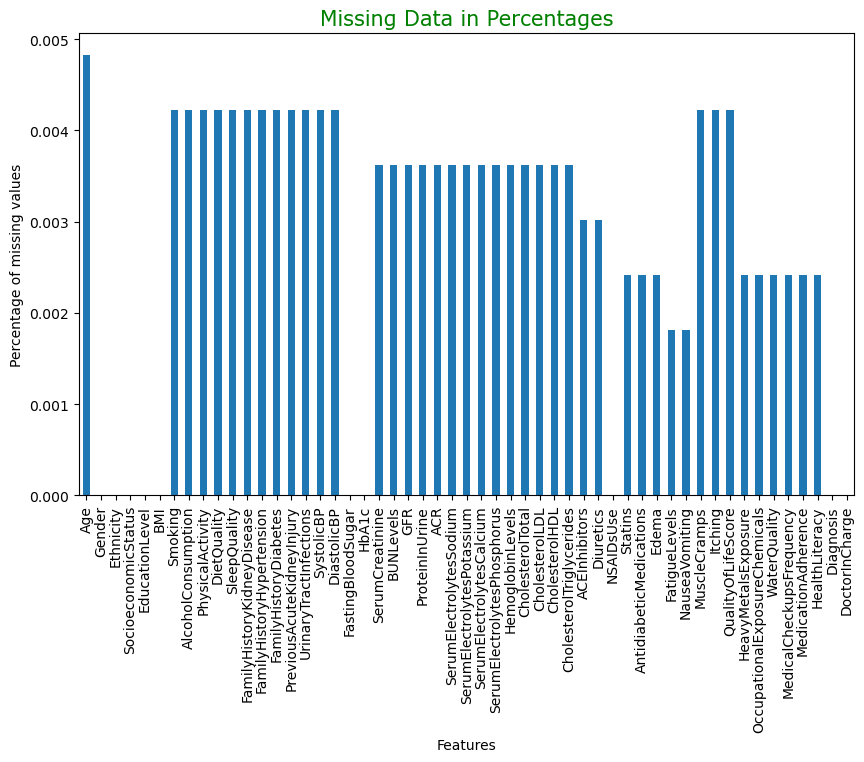

In [19]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages', color='Green',font='Verdana', fontsize=15)

In [20]:
df['Age'].unique()

array([71., 34., 80., 40., 43., 22., 41., 72., 21., 49., 57., 83., 79.,
       52., 77., 68., 78., 61., 81., 66., 70., 74., 26., 58., 37., 23.,
       33., 28., 90., 63., 27., 54., 55., 69., 25., 73., 82., 53., 67.,
       59., 45., 60., 48., 64., 84., 20., 30., 24., 47., 31., 42., 56.,
       46., 62., 32., 51., 85., 76., 89., 75., 38., 87., 36., 88., 35.,
       39., 86., 50., 44., 65., 29., nan])

#### DROPPING UNWANTED COLUMN

In [22]:
df = df.drop(columns=['DoctorInCharge']) # DROPPED BECAUSE IT IS CONFIDENTIAL

#### GROUPING CATEGORICAL AND NUMERICAL COLUMNS

In [24]:
# identify the categorical data in all the columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'ACEInhibitors', 'Diuretics', 'Statins',
       'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality', 'Diagnosis'],
      dtype='object')

In [25]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['Age', 'SocioeconomicStatus', 'BMI', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps',
       'Itching', 'QualityOfLifeScore', 'MedicalCheckupsFrequency',
       'MedicationAdherence', 'HealthLiteracy'],
      dtype='object')

#### FEATURE ENGINEERING

##### HANDLING MISSING VALUES IN CATEGORICAL AND NUMERICAL COLUMNS

In [28]:
# Fill missing categorical values with the mode
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [29]:
# interpolate for age seperately and check for unuique values

In [30]:
#handling missing values for numerical columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()))

##### RECHECKING FOR MISSING VALUES

In [32]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [33]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

#### VISUALISING THE DISTRIBUTION OF CATEGORICAL COLUMNS

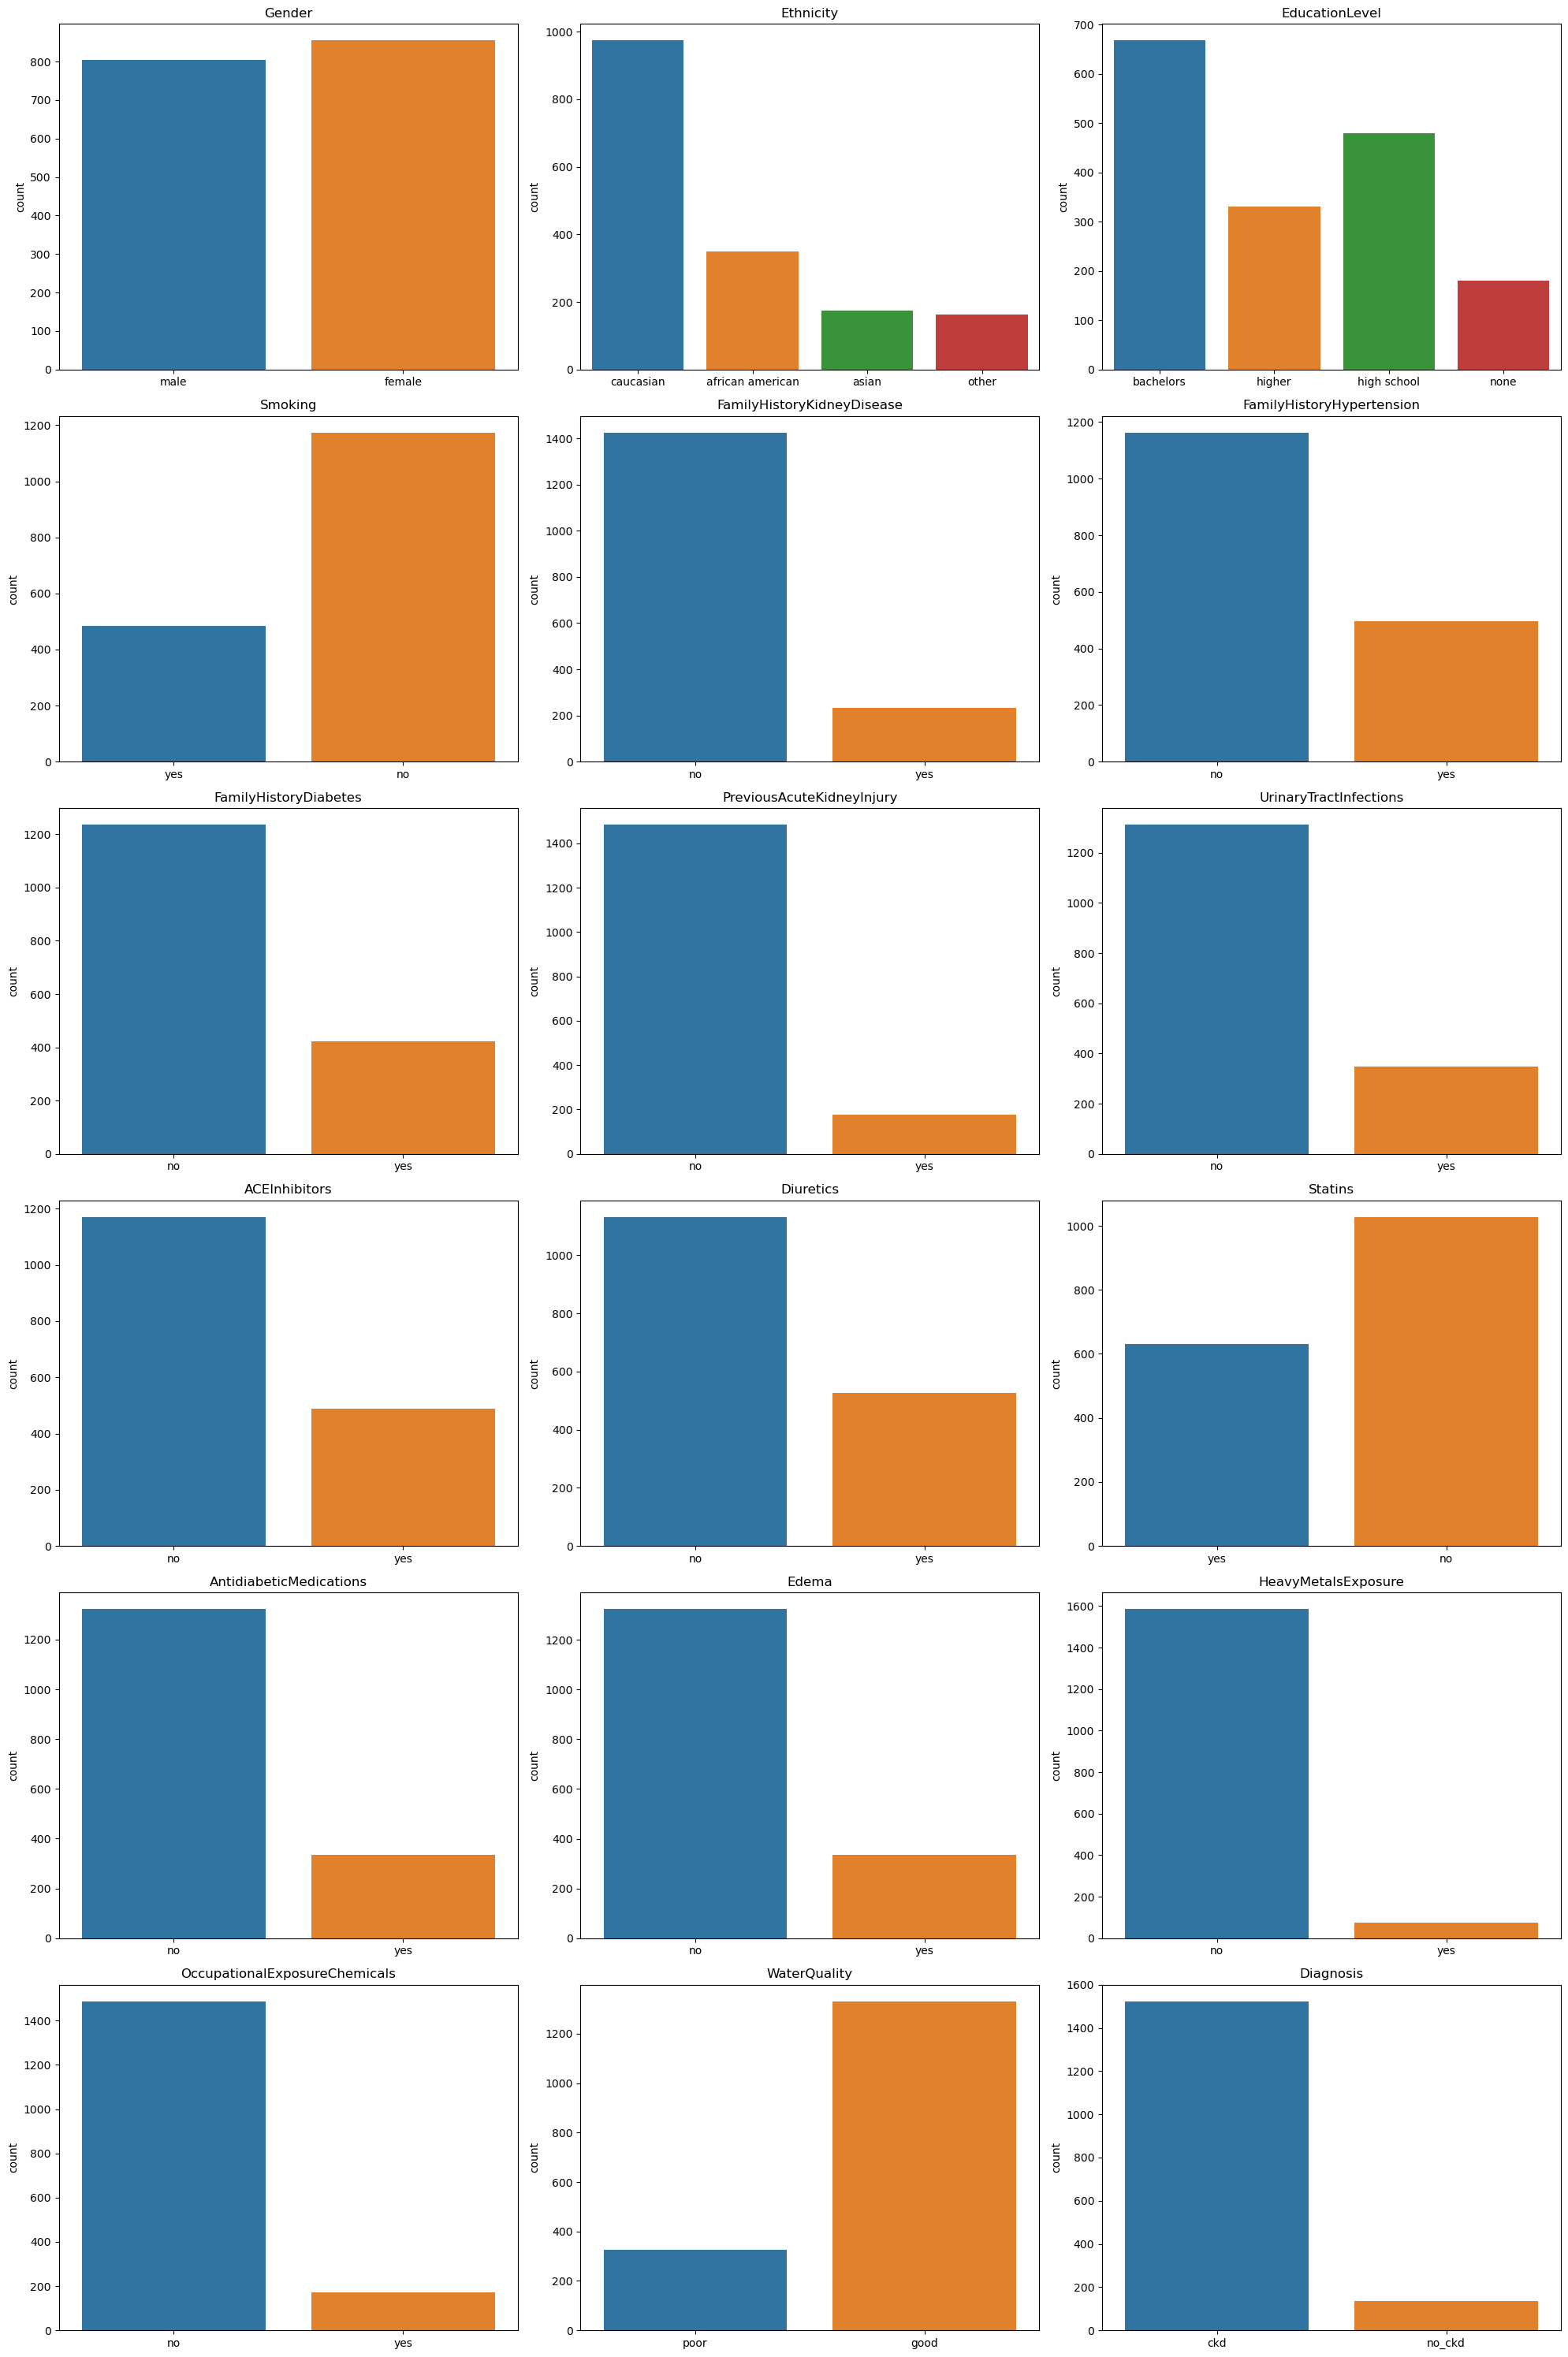

In [35]:
for col in categorical_columns:
    df[col] = df[col].astype('object')
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=0) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### VISUALISING THE DISTRIBUTION OF THE CATEGORICAL COLUMNS AGAINST THE DEPENDANT COLUMN

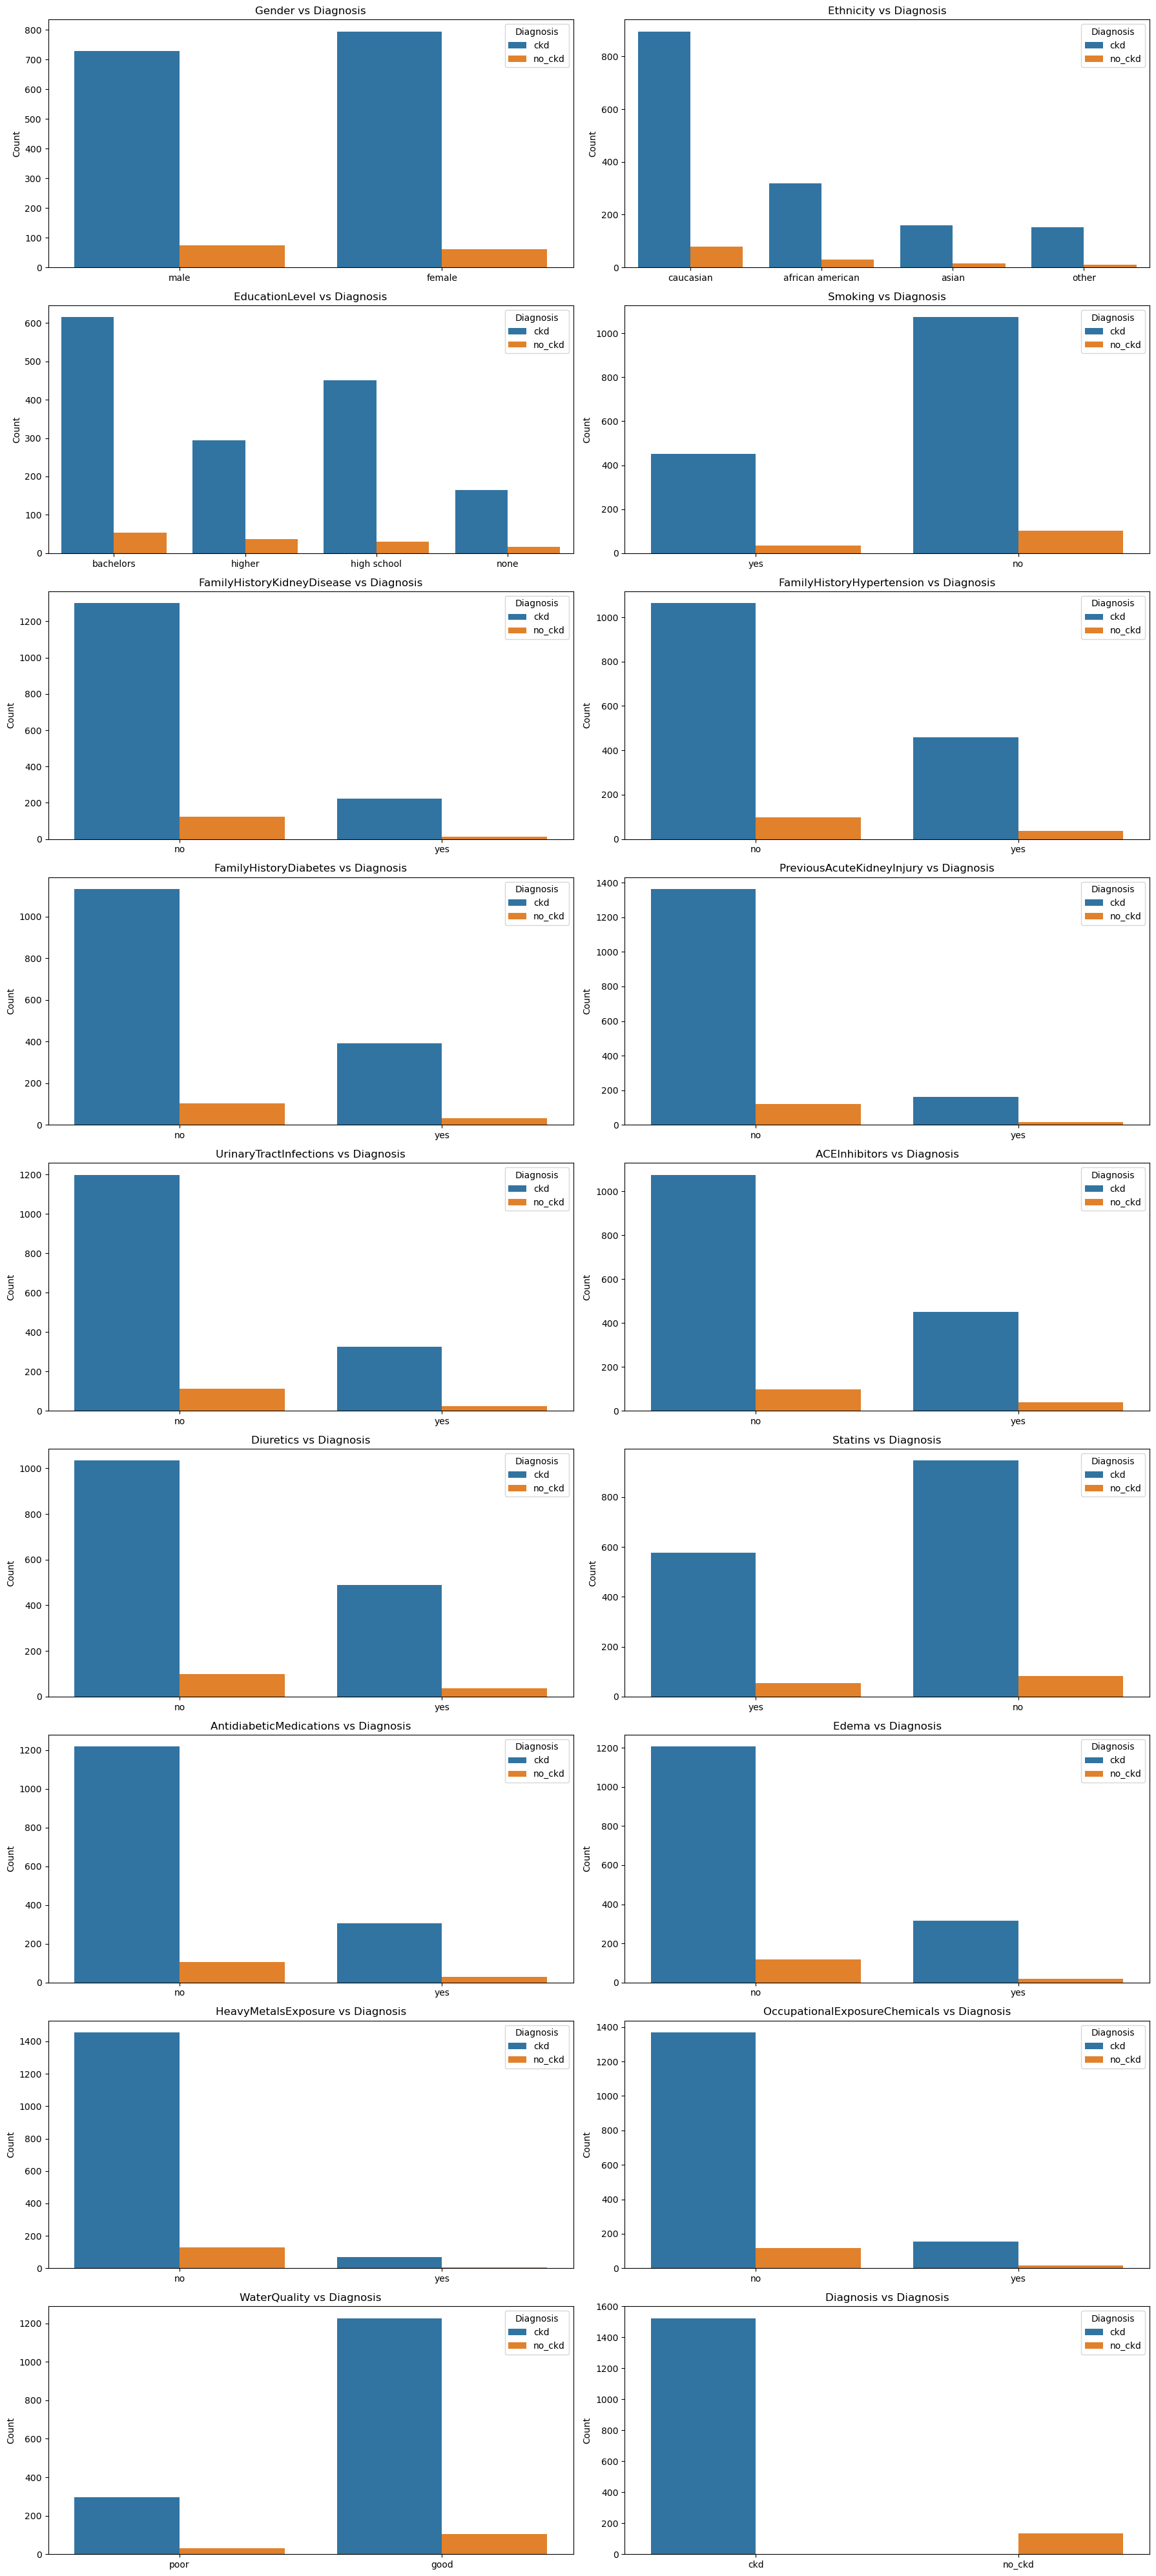

In [37]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 40))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='Diagnosis', ax=axes[i])
    axes[i].set_title(f'{col} vs Diagnosis')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

#### VISUALISING NUMERICAL VARIABLES

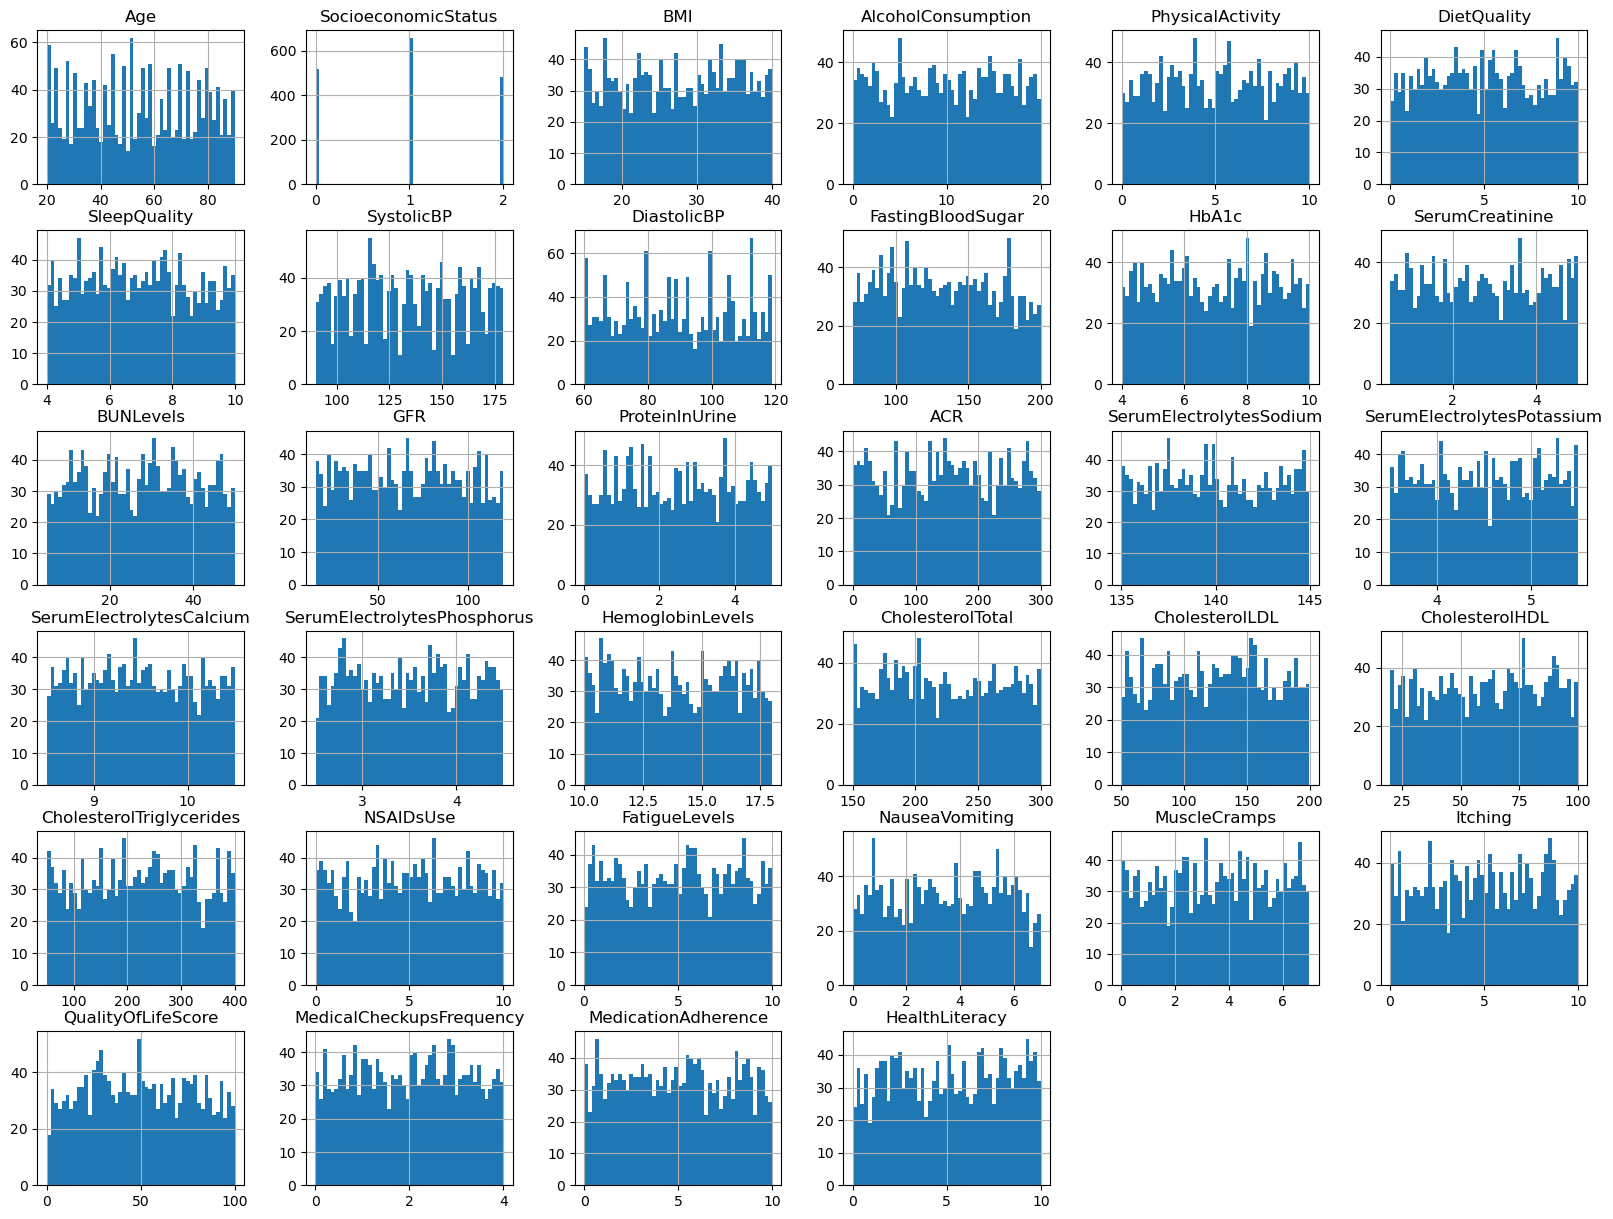

In [39]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##### VISUALISING AGE DISTRIBUTION

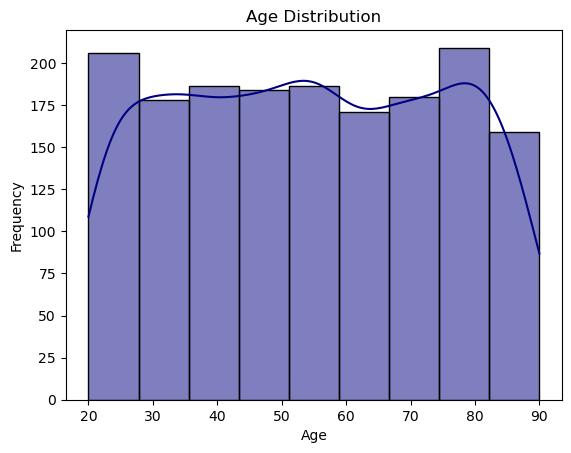

In [41]:
sns.histplot(df['Age'], kde=True, bins=9, color='navy', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

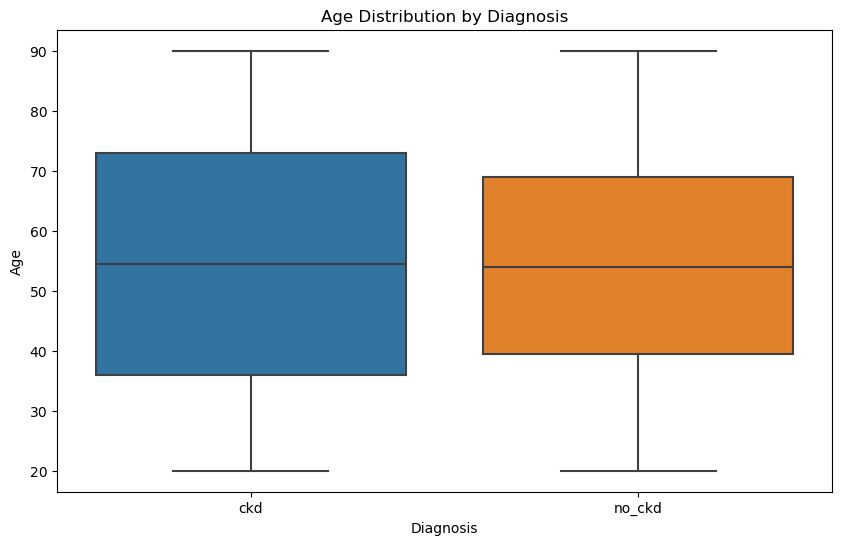

In [42]:
# Create a side-by-side boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.title('Age Distribution by Diagnosis')
plt.show()

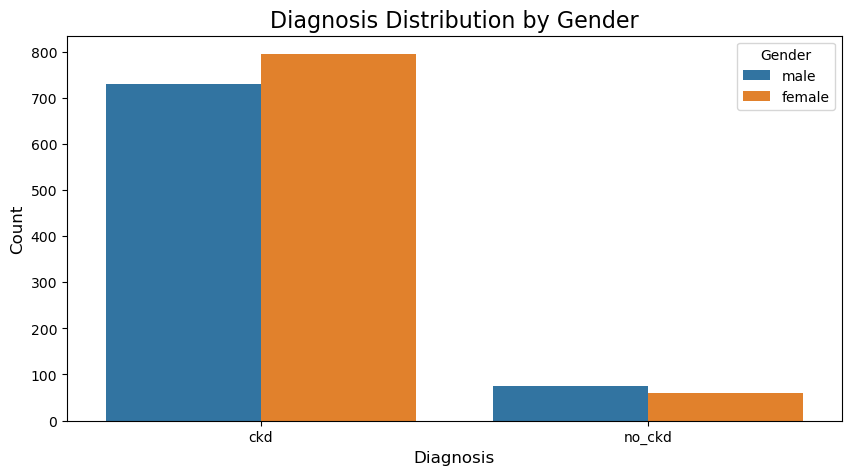

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Diagnosis', hue='Gender')
plt.title('Diagnosis Distribution by Gender', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

#### VISUALISING THE TARGET VARIABLE

Text(0.5, 1.0, 'Diagnosis Distribution')

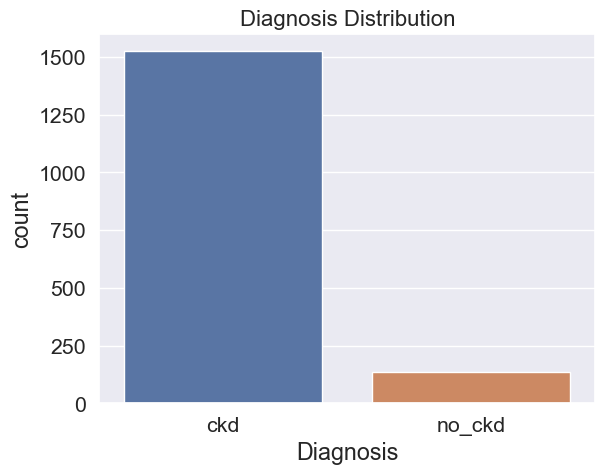

In [45]:
sns.set(font_scale=1.4) 
sns.countplot(df,x=df['Diagnosis'])
plt.title('Diagnosis Distribution', fontsize=16)
#result shows that the dataset is imkbalanced
#imbalance would be handled by oversampling to fulfill the requirements of the first experiment

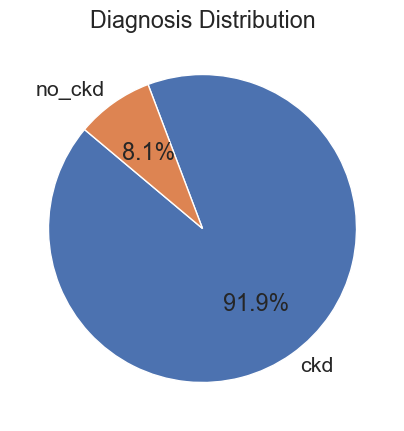

In [46]:
diagnosis_counts = df['Diagnosis'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution')
plt.show()

#### CORRELATION BETWEEN NUMERICAL VARIABLES

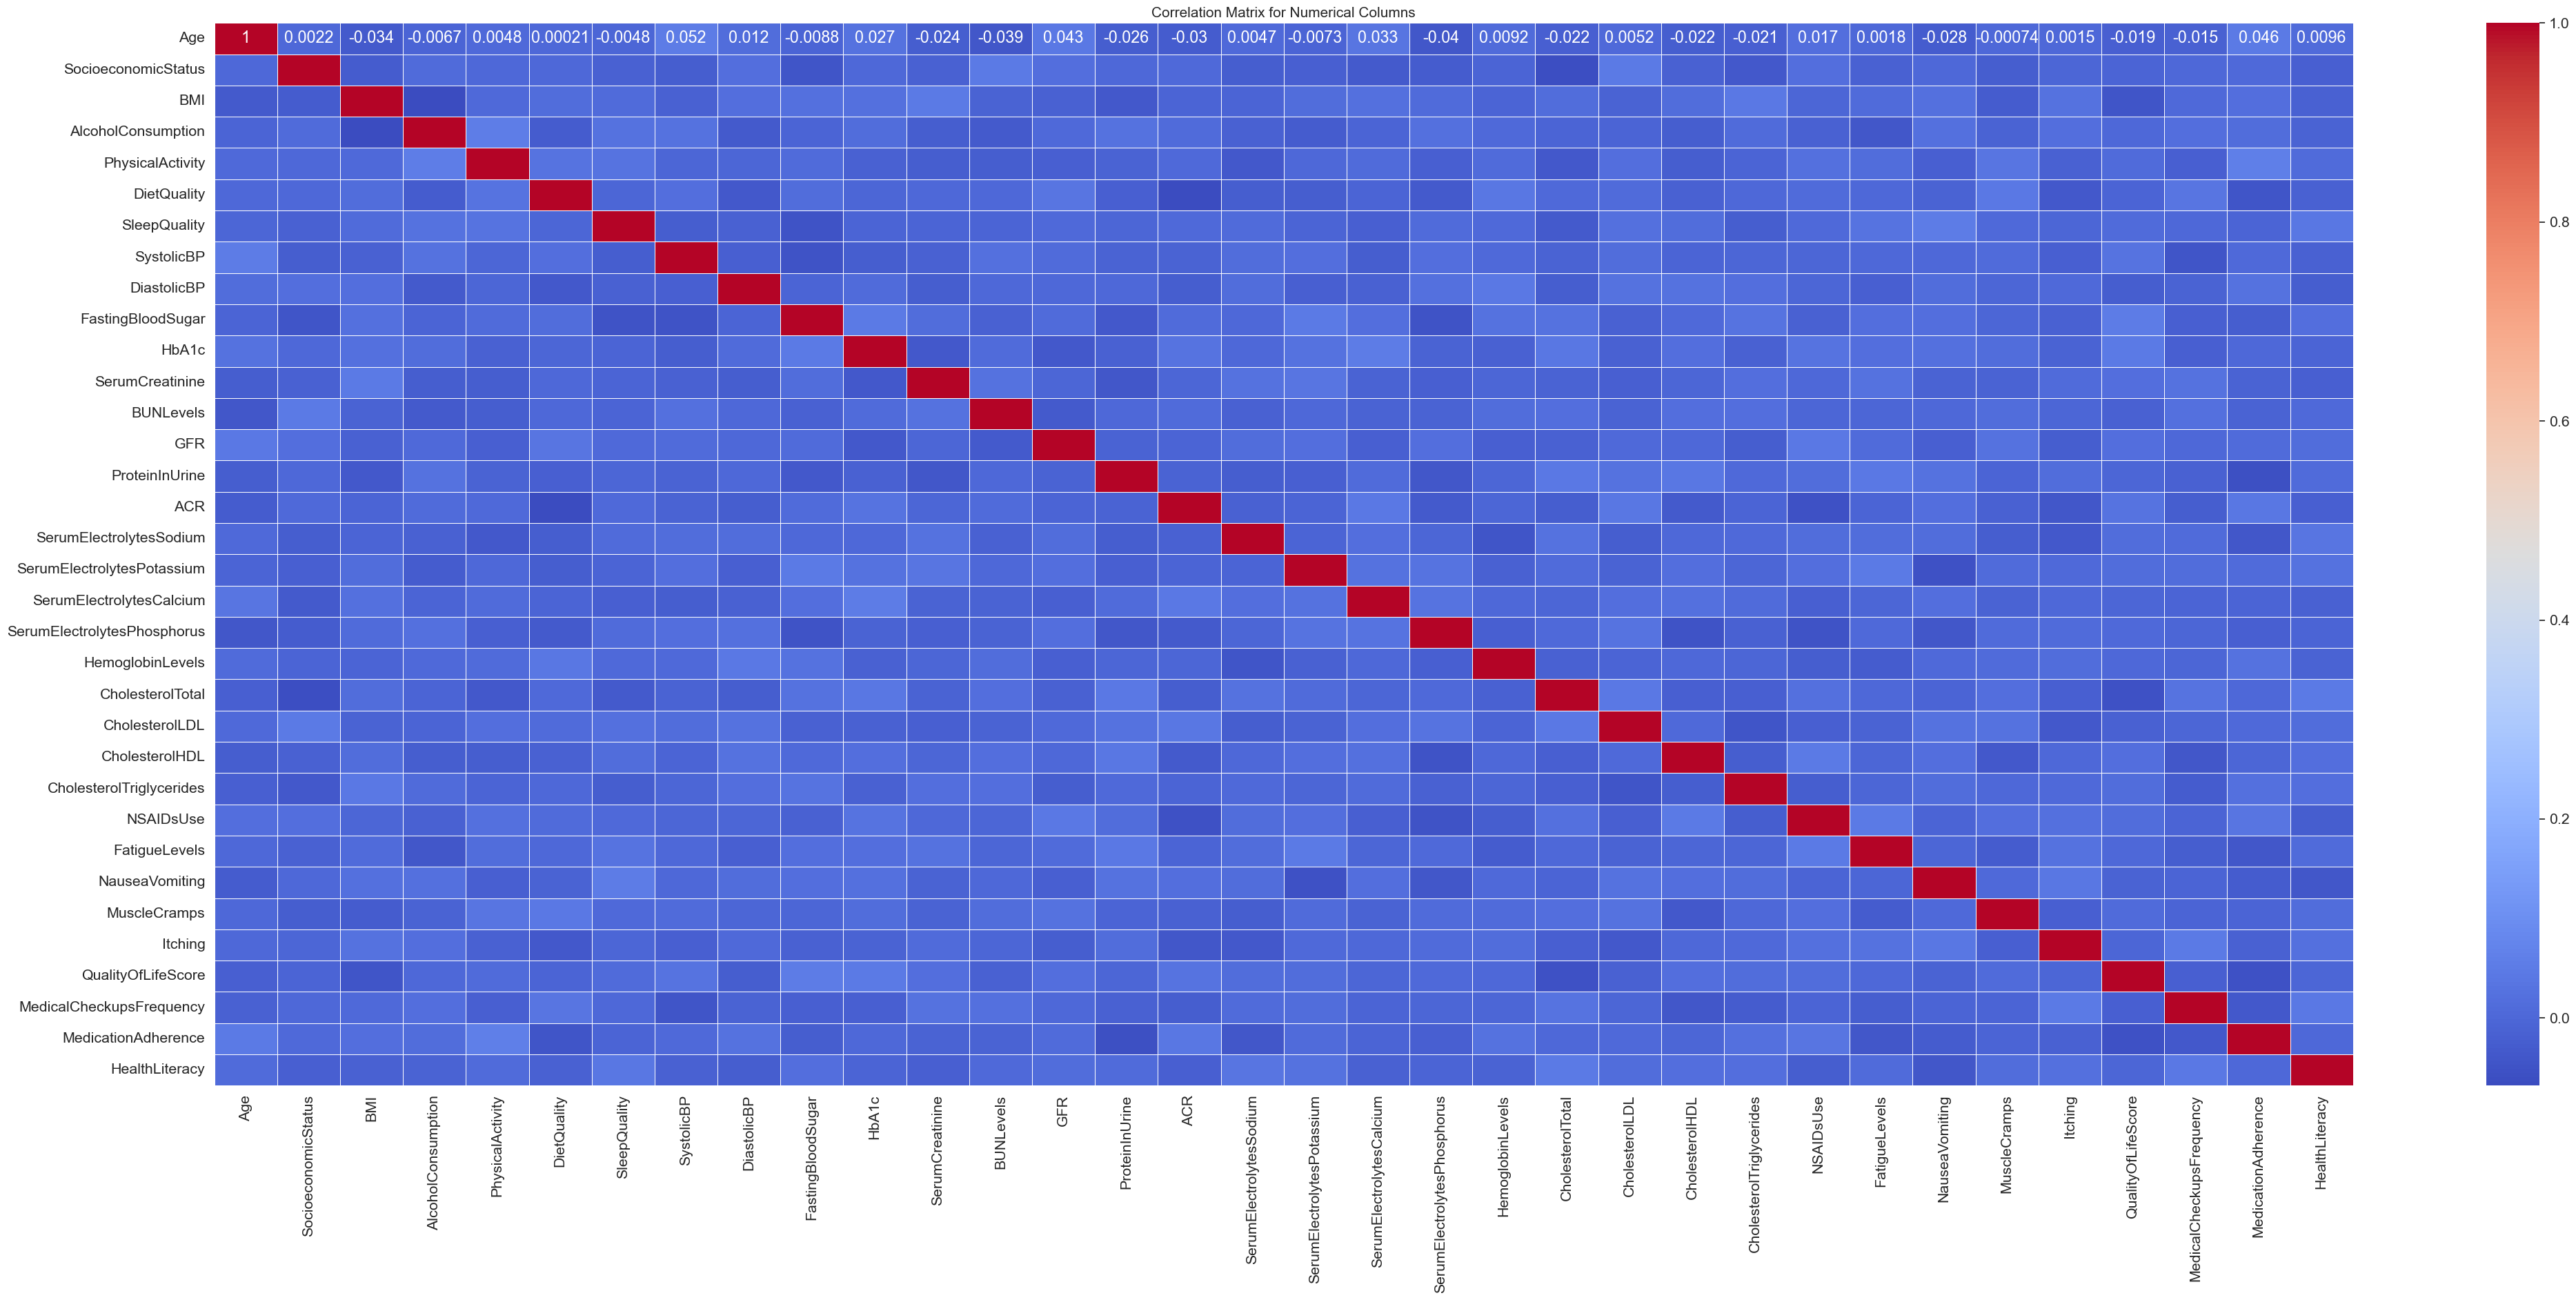

In [48]:
#Correlation matrix to display the correlation between our numerical values
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns', size=20, fontsize=15)
plt.show()


### FEATURE SELECTION

#### ENCODING

In [51]:
le = preprocessing.LabelEncoder()
for cat_colmn in categorical_columns:
    df[cat_colmn] = le.fit_transform(df[cat_colmn])
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
PatientID,,,,,,,,,,,,,,,,,,,,,
1,71.0,1,2,0,0,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,0
2,34.0,1,2,1,2,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,0
3,80.0,0,0,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,0
4,40.0,1,1,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,0
5,43.0,1,0,1,0,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,90.0,1,2,1,0,39.677059,1,1.370151,4.157954,8.602873,...,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,1
1656,34.0,1,2,2,1,28.922015,0,3.372073,9.647525,9.836919,...,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,1
1657,84.0,1,2,2,2,21.951219,0,15.825955,7.349964,5.038194,...,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, 1 to 1659
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1659 non-null   float64
 1   Gender                         1659 non-null   int32  
 2   Ethnicity                      1659 non-null   int32  
 3   SocioeconomicStatus            1659 non-null   int64  
 4   EducationLevel                 1659 non-null   int32  
 5   BMI                            1659 non-null   float64
 6   Smoking                        1659 non-null   int32  
 7   AlcoholConsumption             1659 non-null   float64
 8   PhysicalActivity               1659 non-null   float64
 9   DietQuality                    1659 non-null   float64
 10  SleepQuality                   1659 non-null   float64
 11  FamilyHistoryKidneyDisease     1659 non-null   int32  
 12  FamilyHistoryHypertension      1659 non-null   int32 

#### SPLITTING THE DATASET

In [54]:
x = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

[Text(0.5, 1.0, 'Test set distribution')]

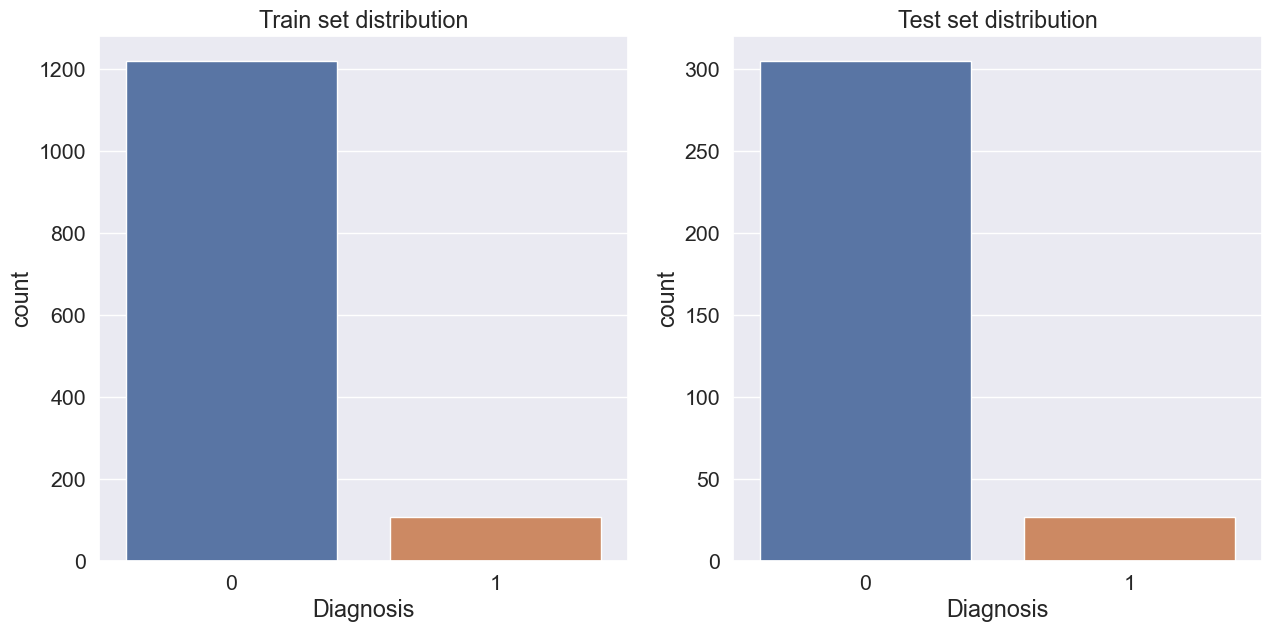

In [56]:
#identifying the distribution between the train set and the test set
plt.figure(figsize = (15, 15))
sns.set(font_scale=1.4)
plt.subplot(221)
sns.countplot(y_train, x=y_train, order =y_train.value_counts().index).set(title='Train set distribution')
plt.subplot(222)
sns.countplot(y_test, x=y_test, order =y_test.value_counts().index).set(title='Test set distribution')

In [57]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

### BALANCING THE DATASET

In [59]:
df_resampled = pd.DataFrame(x_resampled, columns=x.columns)
df_resampled['Diagnosis'] = y_resampled

[Text(0.5, 1.0, 'Test set distribution')]

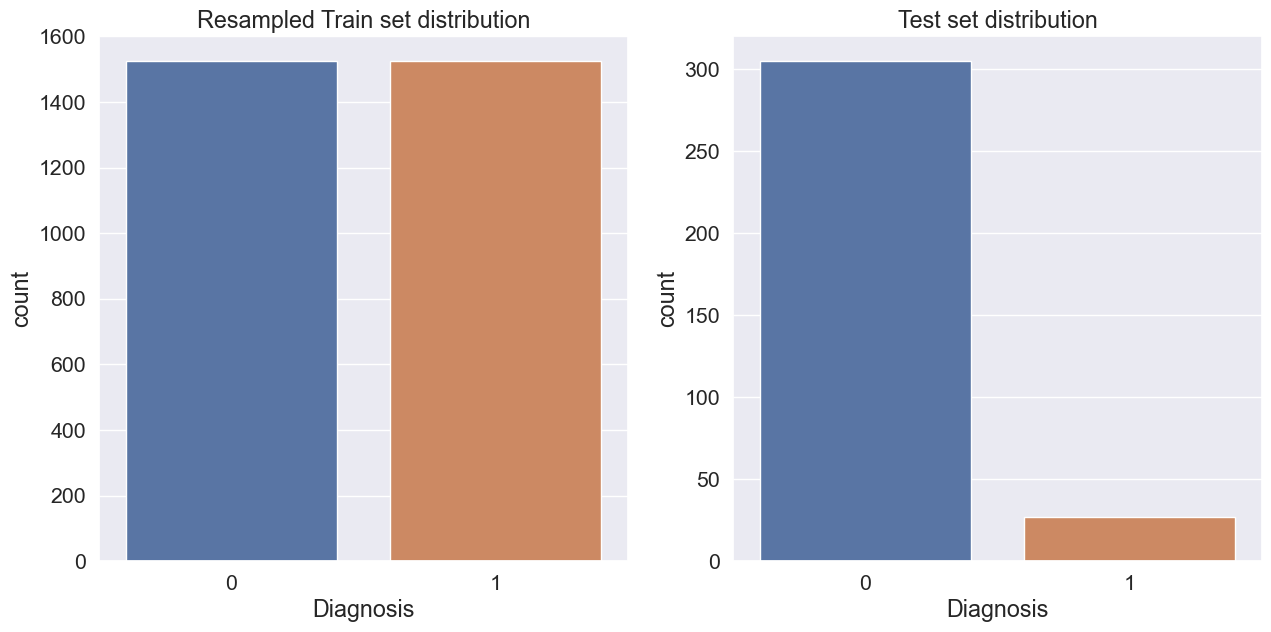

In [60]:
#identifying the distribution between the train set and the test set
plt.figure(figsize = (15, 15))
sns.set(font_scale=1.4)
plt.subplot(221)
sns.countplot(df_resampled, x="Diagnosis").set(title='Resampled Train set distribution')
plt.subplot(222)
sns.countplot(y_test, x=y_test, order =y_test.value_counts().index).set(title='Test set distribution')

## BUILDING THE MODEL

### MODEL OPTIMISATION
#### EXPERIMENT 1
1. getting the results of the models without implementing any hyperparameters
### TUNING THE MODEL
#### ANOVA
#### PCA
##### EXPERIMENT 2
1. handle imbalanced class ovesampling or undersampling ; only on train set
2. standardise imbalanced train and test set
3. train the model with grid search cv
4. find best hyperparameter and evaluate the performance on test set
##### EXPERIMENT 3
1. replace 80 -20 split with k-fold
2. handle imbalanced class ovesampling or undersampling ; only on train set
3. standardise im_handled train and test set
4. find best hyperparameter and evaluate the performance on test set

### SPLITTING THE DATASET

In [64]:
df_resampled.shape

(3048, 52)

In [65]:
# Prepare the data using the resampled dataset
x_resampled = df_resampled.drop(columns=['Diagnosis'])
y_resampled = df_resampled['Diagnosis']

# Standardization
scaler = StandardScaler()
x_resampled_scaled = scaler.fit_transform(x_resampled)

# Split the dataset to obtain the training and testing components
x_train, x_test, y_train, y_test = train_test_split(x_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# EXPERIMENT 1

In [67]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

Training Logistic Regression...
Logistic Regression Confusion Matrix:
[[276  37]
 [ 31 266]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       313
           1       0.88      0.90      0.89       297

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

Logistic Regression Accuracy Score: 0.8885245901639345
Logistic Regression Precision Score: 0.8887324755330234
Logistic Regression Recall Score: 0.8885245901639345
Logistic Regression F1 Score: 0.8885425700687467


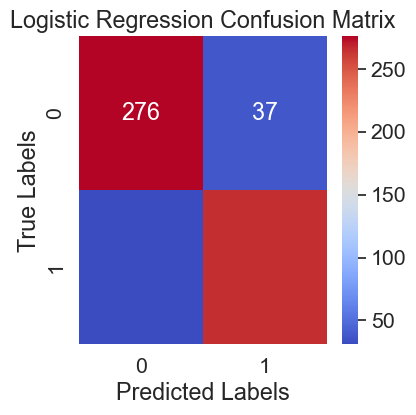

Training K-Nearest Neighbors...
K-Nearest Neighbors Confusion Matrix:
[[102 211]
 [  0 297]]
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49       313
           1       0.58      1.00      0.74       297

    accuracy                           0.65       610
   macro avg       0.79      0.66      0.61       610
weighted avg       0.80      0.65      0.61       610

K-Nearest Neighbors Accuracy Score: 0.6540983606557377
K-Nearest Neighbors Precision Score: 0.7977701045566026
K-Nearest Neighbors Recall Score: 0.6540983606557377
K-Nearest Neighbors F1 Score: 0.6114967803195267


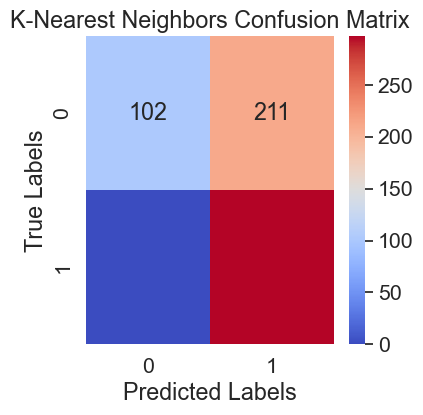

Training Decision Tree...
Decision Tree Confusion Matrix:
[[253  60]
 [ 24 273]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       313
           1       0.82      0.92      0.87       297

    accuracy                           0.86       610
   macro avg       0.87      0.86      0.86       610
weighted avg       0.87      0.86      0.86       610

Decision Tree Accuracy Score: 0.8622950819672132
Decision Tree Precision Score: 0.8678153326434087
Decision Tree Recall Score: 0.8622950819672132
Decision Tree F1 Score: 0.8620283412058907


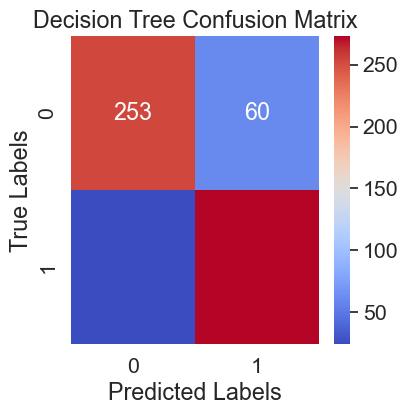

Training Random Forest...
Random Forest Confusion Matrix:
[[306   7]
 [  9 288]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       313
           1       0.98      0.97      0.97       297

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610

Random Forest Accuracy Score: 0.9737704918032787
Random Forest Precision Score: 0.973786369229548
Random Forest Recall Score: 0.9737704918032787
Random Forest F1 Score: 0.9737679519343924


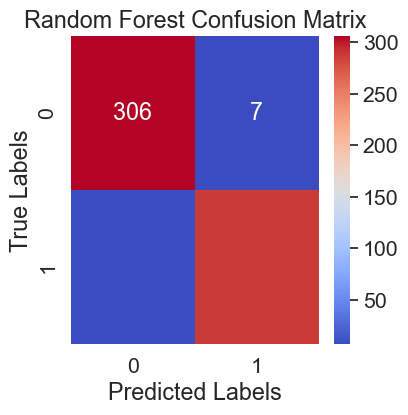

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.888525,0.888732,0.888525,0.888543
1,K-Nearest Neighbors,0.654098,0.797770,0.654098,0.611497
2,Decision Tree,0.862295,0.867815,0.862295,0.862028
3,Random Forest,0.973770,0.973786,0.973770,0.973768


In [68]:
results_exp1 = []
best_model_no_tuning = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy Score: {accuracy}")
    print(f"{model_name} Precision Score: {precision}")
    print(f"{model_name} Recall Score: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    
   # Append metrics to results list
    results_exp1.append({
        'Model': model_name, 
        'Accuracy Score': accuracy, 
        'Precision Score': precision, 
        'Recall Score': recall, 
        'F1 Score': f1
    })
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.show()

results_exp1_df = pd.DataFrame(results_exp1)
results_exp1_df

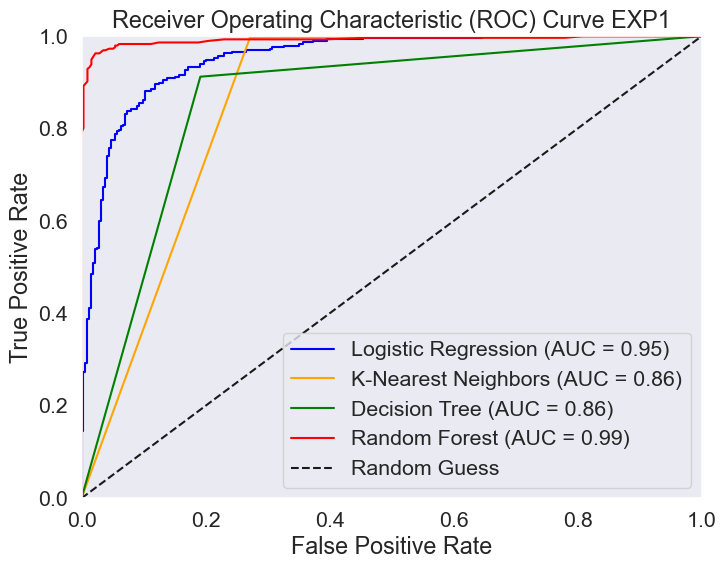

In [69]:
# Define your models here
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

# Iterate over models and plot ROC curves
for i, (model_name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve EXP1')
plt.legend()
plt.grid()
plt.show()

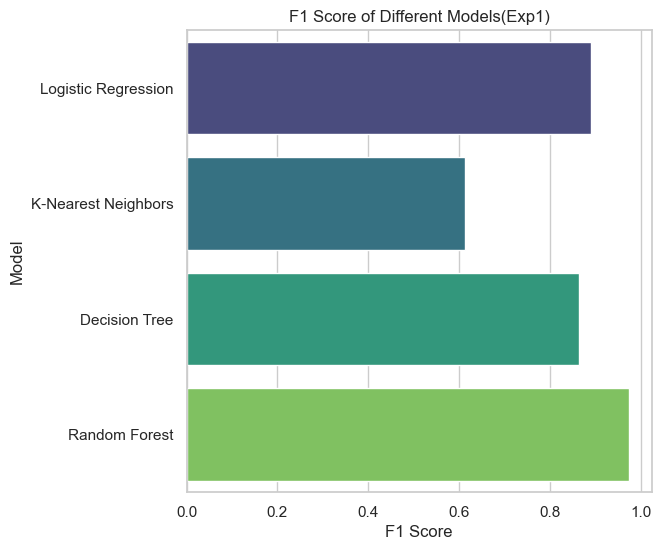

In [70]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the F1 Scores of each model
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x='F1 Score', y='Model', data=results_exp1_df, palette='viridis')

bar_plot.set_title('F1 Score of Different Models(Exp1)')
bar_plot.set_xlabel('F1 Score')
bar_plot.set_ylabel('Model')
plt.show()

## ANOVA

In [72]:
f_values, p_values = f_classif(x_resampled, y_resampled)
anova_result = pd.DataFrame({'Feature': x_resampled.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_result = anova_result.sort_values(by='P-Value')
significant_features = anova_result[anova_result['P-Value'] <= 0.05]['Feature'].tolist()

significant_features

['SerumCreatinine',
 'GFR',
 'Diuretics',
 'Edema',
 'Smoking',
 'FamilyHistoryHypertension',
 'UrinaryTractInfections',
 'FamilyHistoryKidneyDisease',
 'FamilyHistoryDiabetes',
 'Statins',
 'Itching',
 'ACEInhibitors',
 'AntidiabeticMedications',
 'WaterQuality',
 'FastingBloodSugar',
 'MuscleCramps',
 'PreviousAcuteKidneyInjury',
 'SystolicBP',
 'Ethnicity',
 'ProteinInUrine',
 'BUNLevels',
 'OccupationalExposureChemicals',
 'Gender',
 'HeavyMetalsExposure',
 'SocioeconomicStatus',
 'EducationLevel',
 'BMI',
 'HbA1c',
 'CholesterolTotal',
 'HemoglobinLevels',
 'CholesterolHDL',
 'QualityOfLifeScore',
 'DiastolicBP',
 'SerumElectrolytesPotassium',
 'DietQuality',
 'SerumElectrolytesSodium',
 'PhysicalActivity',
 'SleepQuality',
 'SerumElectrolytesCalcium']

In [73]:
# total number of significant features
print(f"Total number of significant features: {len(significant_features)}")

Total number of significant features: 39


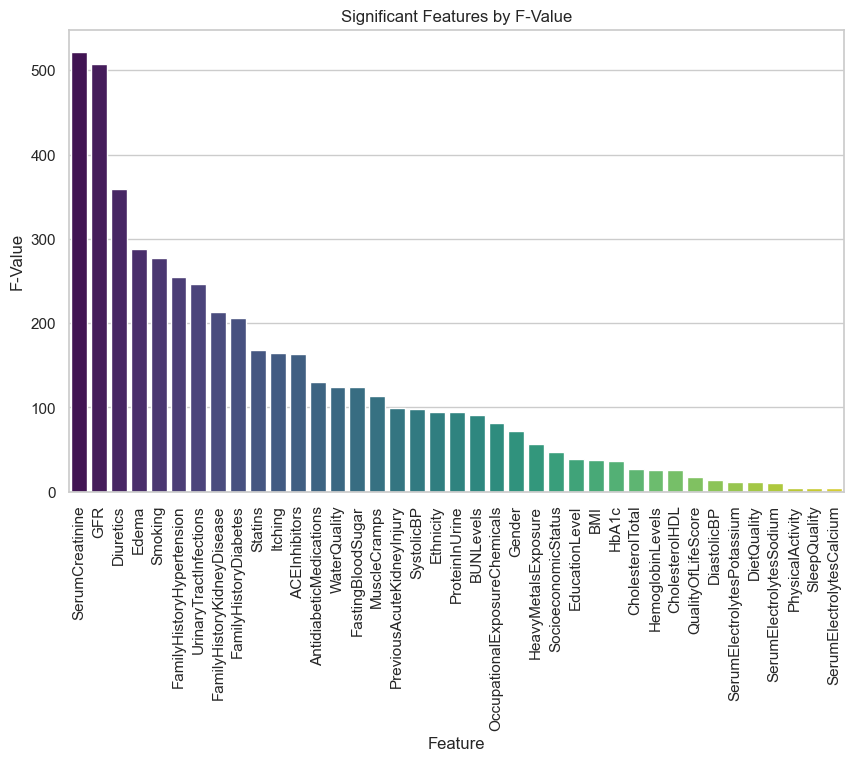

In [74]:
significant_anova_result = anova_result[anova_result['Feature'].isin(significant_features)]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='F-Value', data=significant_anova_result, palette='viridis')
plt.xticks(rotation=90)
plt.title('Significant Features by F-Value')
plt.xlabel('Feature')
plt.ylabel('F-Value')
plt.show()

# PCA

In [76]:
x_sig = pd.DataFrame(x_resampled, columns = x.columns)[significant_features]

In [77]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_sig)

In [78]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

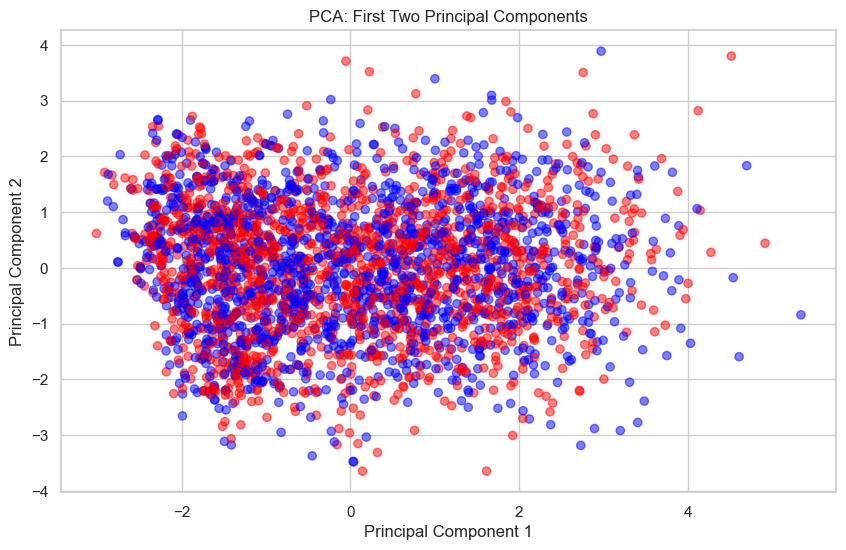

In [79]:
# Define colors for two different groups
colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(x_pca))]

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors, alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [80]:
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >=0.95) + 1


In [81]:
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_resampled, test_size=0.2, random_state=42)

# EXPERIMENT 2

In [83]:
# Define the hyperparameter
models_exp2 = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [84]:
# Storage for results
best_model = {}
best_param = {}
best_score = {}

In [85]:
# Perform grid search
for model_name in models:
    print(f"Tuning {model_name}...")
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=models_exp2[model_name],
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring='f1'
    )
    
    # Fit GridSearchCV
    grid_search.fit(x_train, y_train)
    
    # Store results in the dictionary
    best_model[model_name] = grid_search.best_estimator_
    best_param[model_name] = grid_search.best_params_
    best_score[model_name] = grid_search.best_score_


Tuning Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


Training Logistic Regression...
Logistic Regression Confusion Matrix:
[[271  42]
 [ 32 265]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       313
           1       0.86      0.89      0.88       297

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

Logistic Regression Accuracy Score: 0.8786885245901639
Logistic Regression Precision Score: 0.879199955025139
Logistic Regression Recall Score: 0.8786885245901639
Logistic Regression F1 Score: 0.8787080875914879


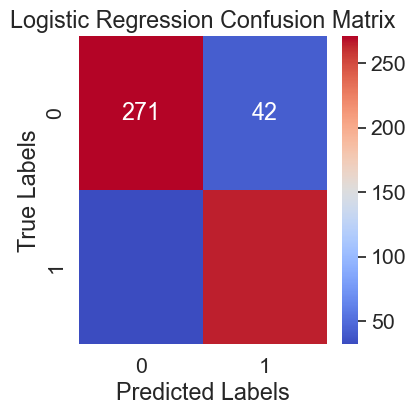

Training K-Nearest Neighbors...
K-Nearest Neighbors Confusion Matrix:
[[203 110]
 [  0 297]]
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       313
           1       0.73      1.00      0.84       297

    accuracy                           0.82       610
   macro avg       0.86      0.82      0.82       610
weighted avg       0.87      0.82      0.81       610

K-Nearest Neighbors Accuracy Score: 0.819672131147541
K-Nearest Neighbors Precision Score: 0.8684093929995569
K-Nearest Neighbors Recall Score: 0.819672131147541
K-Nearest Neighbors F1 Score: 0.8145392521286058


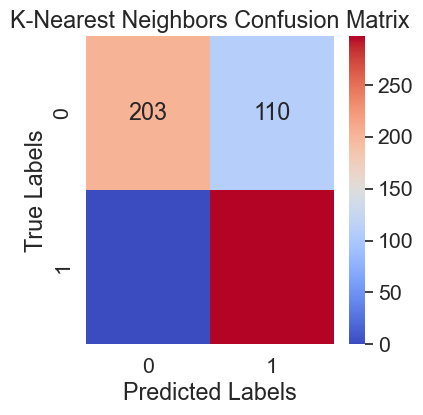

Training Decision Tree...
Decision Tree Confusion Matrix:
[[273  40]
 [ 35 262]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       313
           1       0.87      0.88      0.87       297

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

Decision Tree Accuracy Score: 0.8770491803278688
Decision Tree Precision Score: 0.877203393176143
Decision Tree Recall Score: 0.8770491803278688
Decision Tree F1 Score: 0.8770673595667021


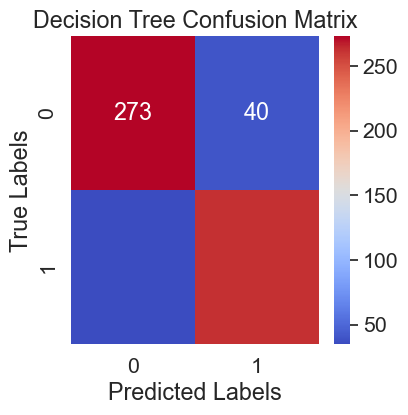

Training Random Forest...
Random Forest Confusion Matrix:
[[298  15]
 [ 26 271]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       313
           1       0.95      0.91      0.93       297

    accuracy                           0.93       610
   macro avg       0.93      0.93      0.93       610
weighted avg       0.93      0.93      0.93       610

Random Forest Accuracy Score: 0.9327868852459016
Random Forest Precision Score: 0.9332881852007536
Random Forest Recall Score: 0.9327868852459016
Random Forest F1 Score: 0.9327331322735857


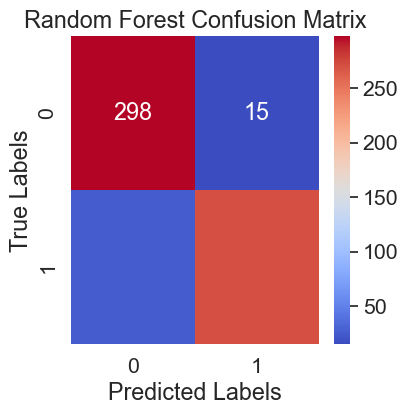

                 Model  Accuracy Score  Precision Score  Recall Score  \
0  Logistic Regression        0.878689         0.879200      0.878689   
1  K-Nearest Neighbors        0.819672         0.868409      0.819672   
2        Decision Tree        0.877049         0.877203      0.877049   
3        Random Forest        0.932787         0.933288      0.932787   

   F1 Score  
0  0.878708  
1  0.814539  
2  0.877067  
3  0.932733  


In [86]:
# Store results
results_exp2 = []

# Evaluate for each model
for model_name, model in best_model.items():
    print(f"Training {model_name}...")
    
    # Predict with the best model
    y_pred = model.predict(x_test)
    
   # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy Score: {accuracy}")
    print(f"{model_name} Precision Score: {precision}")
    print(f"{model_name} Recall Score: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    
   # Append metrics to results list
    results_exp2.append({
        'Model': model_name, 
        'Accuracy Score': accuracy, 
        'Precision Score': precision, 
        'Recall Score': recall, 
        'F1 Score': f1
    })
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.show()

# Convert results to DataFrame
results_exp2_df = pd.DataFrame(results_exp2)
print(results_exp2_df)


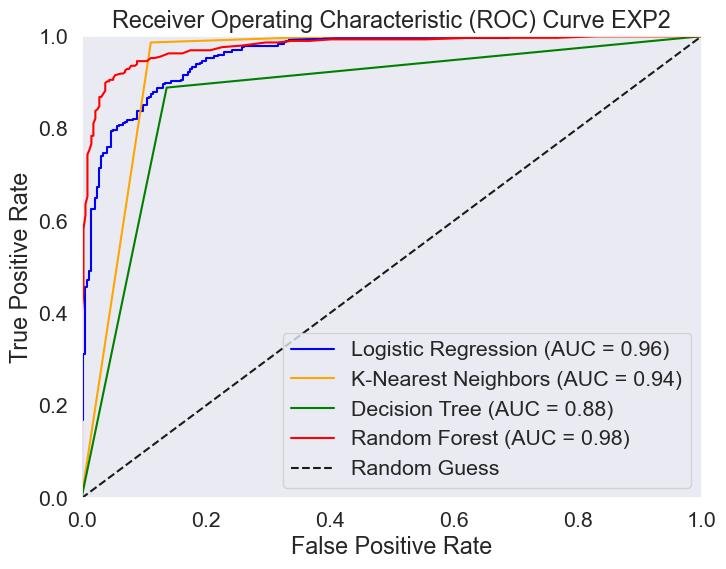

In [87]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

# Iterate over models and plot ROC curves
for i, (model_name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve EXP2')
plt.legend()
plt.grid()
plt.show()

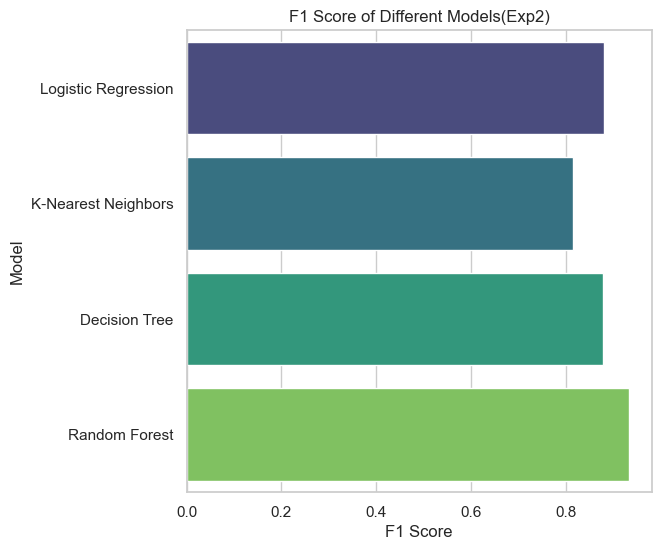

In [88]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the F1 Scores of each model
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x='F1 Score', y='Model', data=results_exp2_df, palette='viridis')

bar_plot.set_title('F1 Score of Different Models(Exp2)')
bar_plot.set_xlabel('F1 Score')
bar_plot.set_ylabel('Model')
plt.show()

# EXPERIMENT 3

In [90]:
n_samples, n_features = df.shape
print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 1659
Number of features: 52


In [91]:
# Create the dataset
x, y = make_classification(n_samples=1659, n_features=52, random_state=1, n_informative=39, n_redundant=13)

In [92]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cnt = 1
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1327, Test set:332
Fold:2, Train set: 1327, Test set:332
Fold:3, Train set: 1327, Test set:332
Fold:4, Train set: 1327, Test set:332
Fold:5, Train set: 1328, Test set:331


In [93]:
# Outer cross-validation loop
for train_index, test_index in kf.split(x, y):
    # Split data
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Apply SMOTE 
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Normalize the training and test sets
scaler = StandardScaler()
x_train_res = scaler.fit_transform(x_train_res)
x_test = scaler.transform(x_test)

In [94]:
models_exp3 = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.01, 0.1, 1, 10, 100]}
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    }
}
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [95]:
results_exp3 = []
for model_name, model_info in models_exp3.items():
    print(f"Training {model_name}...")
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=cv_inner, n_jobs=-1, verbose=2, scoring='f1', refit=True)
    result = grid_search.fit(x_train_res, y_train_res)
    
    best_model = result.best_estimator_

    # Predictions on the test set
    y_pred = best_model.predict(x_test)

    # store fold metrics
    fold_metrics = {'f1': [], 'accuracy': [], 'precision': [], 'recall': []}

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    
    # Store results
    fold_metrics['accuracy'].append(accuracy)
    fold_metrics['precision'].append(precision)
    fold_metrics['recall'].append(recall)
    fold_metrics['f1'].append(f1)
    
    # Append mean metrics for the model
    mean_f1 = np.mean(fold_metrics['f1'])
    mean_accuracy = np.mean(fold_metrics['accuracy'])
    mean_precision = np.mean(fold_metrics['precision'])
    mean_recall = np.mean(fold_metrics['recall'])
    
    results_exp3.append({
        'Model': model_name,
        'F1 Score': mean_f1,
        'Accuracy': mean_accuracy,
        'Precision': mean_precision,
        'Recall': mean_recall,
        'Best Parameters': result.best_params_,
        'best_model': best_model,
        'Classification Report': class_report  
    })
    
    # Print results
    print(f"Results for {model_name}:")
    print(f"F1 Score: {mean_f1}")
    print(f"Accuracy: {mean_accuracy}")
    print(f"Precision: {mean_precision}")
    print(f"Recall: {mean_recall}")
    print(f"Best Parameters: {result.best_params_}")
    print(f"Classification Report:\n{class_report}")
    print("-" * 50)
    
results_exp3_df = pd.DataFrame(results_exp3)
print(results_exp3_df)

Training Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Results for Logistic Regression:
F1 Score: 0.845820135452124
Accuracy: 0.8459214501510574
Precision: 0.8469725150509971
Recall: 0.8459214501510574
Best Parameters: {'C': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       166
           1       0.83      0.87      0.85       165

    accuracy                           0.85       331
   macro avg       0.85      0.85      0.85       331
weighted avg       0.85      0.85      0.85       331

--------------------------------------------------
Training K-Nearest Neighbors...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Results for K-Nearest Neighbors:
F1 Score: 0.9395704207236548
Accuracy: 0.9395770392749244
Precision: 0.9398383468412129
Recall: 0.9395770392749244
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Classification Report:
           

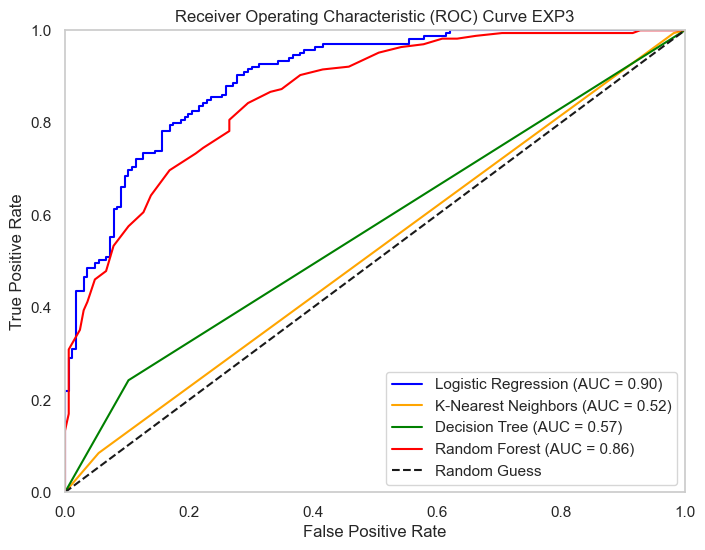

In [96]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(8, 6))

# Iterate over models and plot ROC curves
for i, (model_name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve EXP3')
plt.legend()
plt.grid()
plt.show()

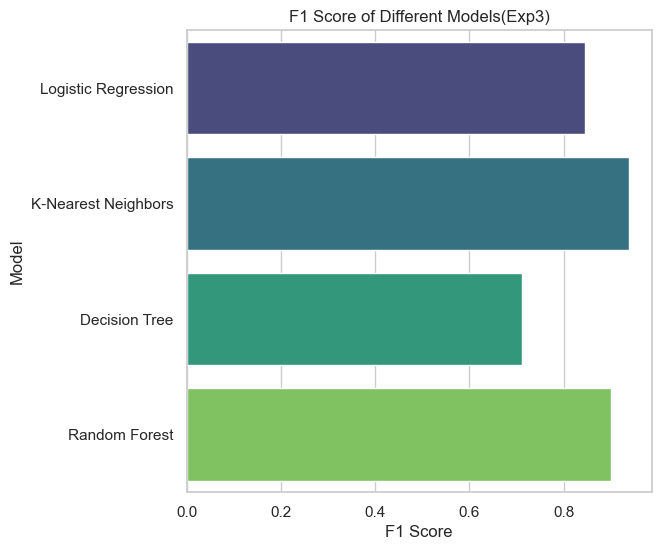

In [97]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the F1 Scores of each model
plt.figure(figsize=(6, 6))
bar_plot = sns.barplot(x='F1 Score', y='Model', data=results_exp3_df, palette='viridis')

bar_plot.set_title('F1 Score of Different Models(Exp3)')
bar_plot.set_xlabel('F1 Score')
bar_plot.set_ylabel('Model')
plt.show()

# COMBINING ALL THE RESULTS
1. CREATE A TABLE SHOWING THE F1 SCORES OF ALL THE EXPERIMENTS
2. BAR GRAPH COMPARISON OF ALL THE MODELS

In [99]:
# Add experiment identifiers
results_exp1_df['Experiment'] = 'DEFAULT HYPERPARAMETER'
results_exp2_df['Experiment'] = 'GRID SEARCH CV'
results_exp3_df['Experiment'] = 'K-FOLD'

In [100]:
# Combine all results into one DataFrame
all_results_df = pd.concat([results_exp1_df, results_exp2_df, results_exp3_df])

# Pivot the table to have experiments as columns and models as rows
pivot_df = all_results_df.pivot(index='Model', columns='Experiment', values='F1 Score')

# Optionally, you can reset the index for a cleaner look
pivot_df = pivot_df.reset_index()
print(pivot_df)

Experiment                Model  DEFAULT HYPERPARAMETER  GRID SEARCH CV  \
0                 Decision Tree                0.862028        0.877067   
1           K-Nearest Neighbors                0.611497        0.814539   
2           Logistic Regression                0.888543        0.878708   
3                 Random Forest                0.973768        0.932733   

Experiment    K-FOLD  
0           0.712645  
1           0.939570  
2           0.845820  
3           0.900264  


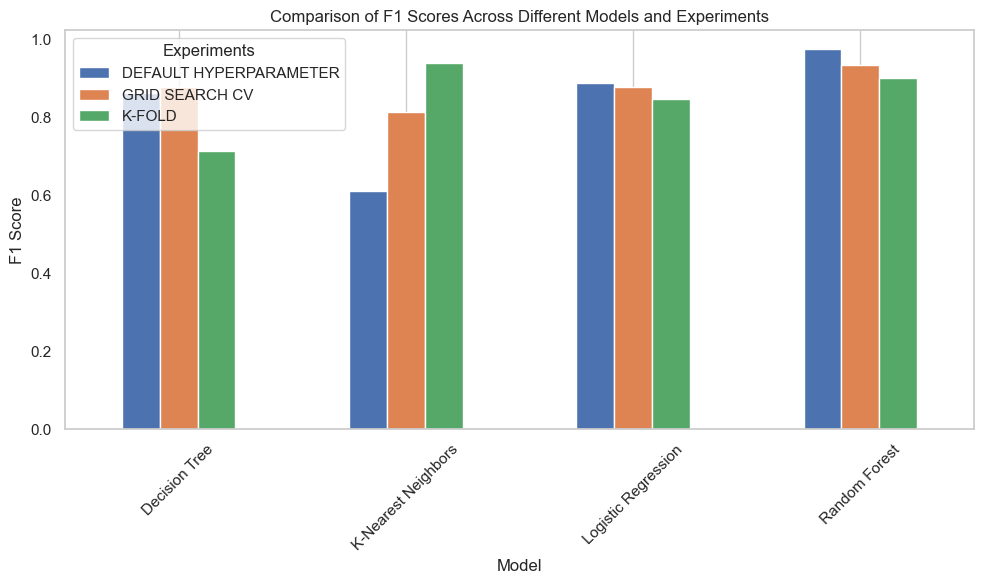

In [101]:
pivot_df.set_index('Model', inplace=True)

# Plotting the bar graph
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of F1 Scores Across Different Models and Experiments')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Experiments')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()